In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

В задаче необходимо понять, кто из содрудников останется работать в компании. В данном датасете представлена информация о 15000 работниках. Нужно определить, останется ли человек работать на основании его характеристик, например уровень доверия, количество проектов, название отдела и другие.

# Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/KAD1029/ML_2021/main/employee.csv"
data_raw = pd.read_csv(url)
#data = pd.read_csv('employee.csv')

Можем видеть, что в таблице находится 14999 строк и 10 столбцов

In [3]:
data.shape

(14999, 10)

In [4]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


Посмотрим, какие значения принимают признаки

In [5]:
for column in data.columns :
    print(column, '          ', data[column].unique())

satisfaction_level            [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation            [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project            [2 5 7 6 4 3]
average_montly_hours            [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282

# Обработка номинальных признаков

Было видно, что присутствуют численные категориальные признаки, номинальные признаки и категориальные строковые.
Обработаем строковые признаки двумя способами.
Один принимает одно из трех значений. Заменим их числами от 0 до 2.
Второй принимает одно из 10 значений. Заменим его десятью бинарными признаками.

In [6]:
department_dummies = pd.get_dummies(data['department'])

In [7]:
department_dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [8]:
data = pd.concat((data, department_dummies), axis=1)
data = data.drop(['department'], axis=1)

data['salary'] = pd.factorize(data['salary'])[0]

In [9]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0


Увидим, что признаков стало больше и все они численные

In [10]:
for column in data.columns :
    print(column, '          ', data[column].unique())

satisfaction_level            [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation            [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project            [2 5 7 6 4 3]
average_montly_hours            [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282

# Выбросы

Проверим данные на наличие выбросов.
Построим диаграммы рассеивания. Из них видно, что значения сгруппированы и выбросов не видно.

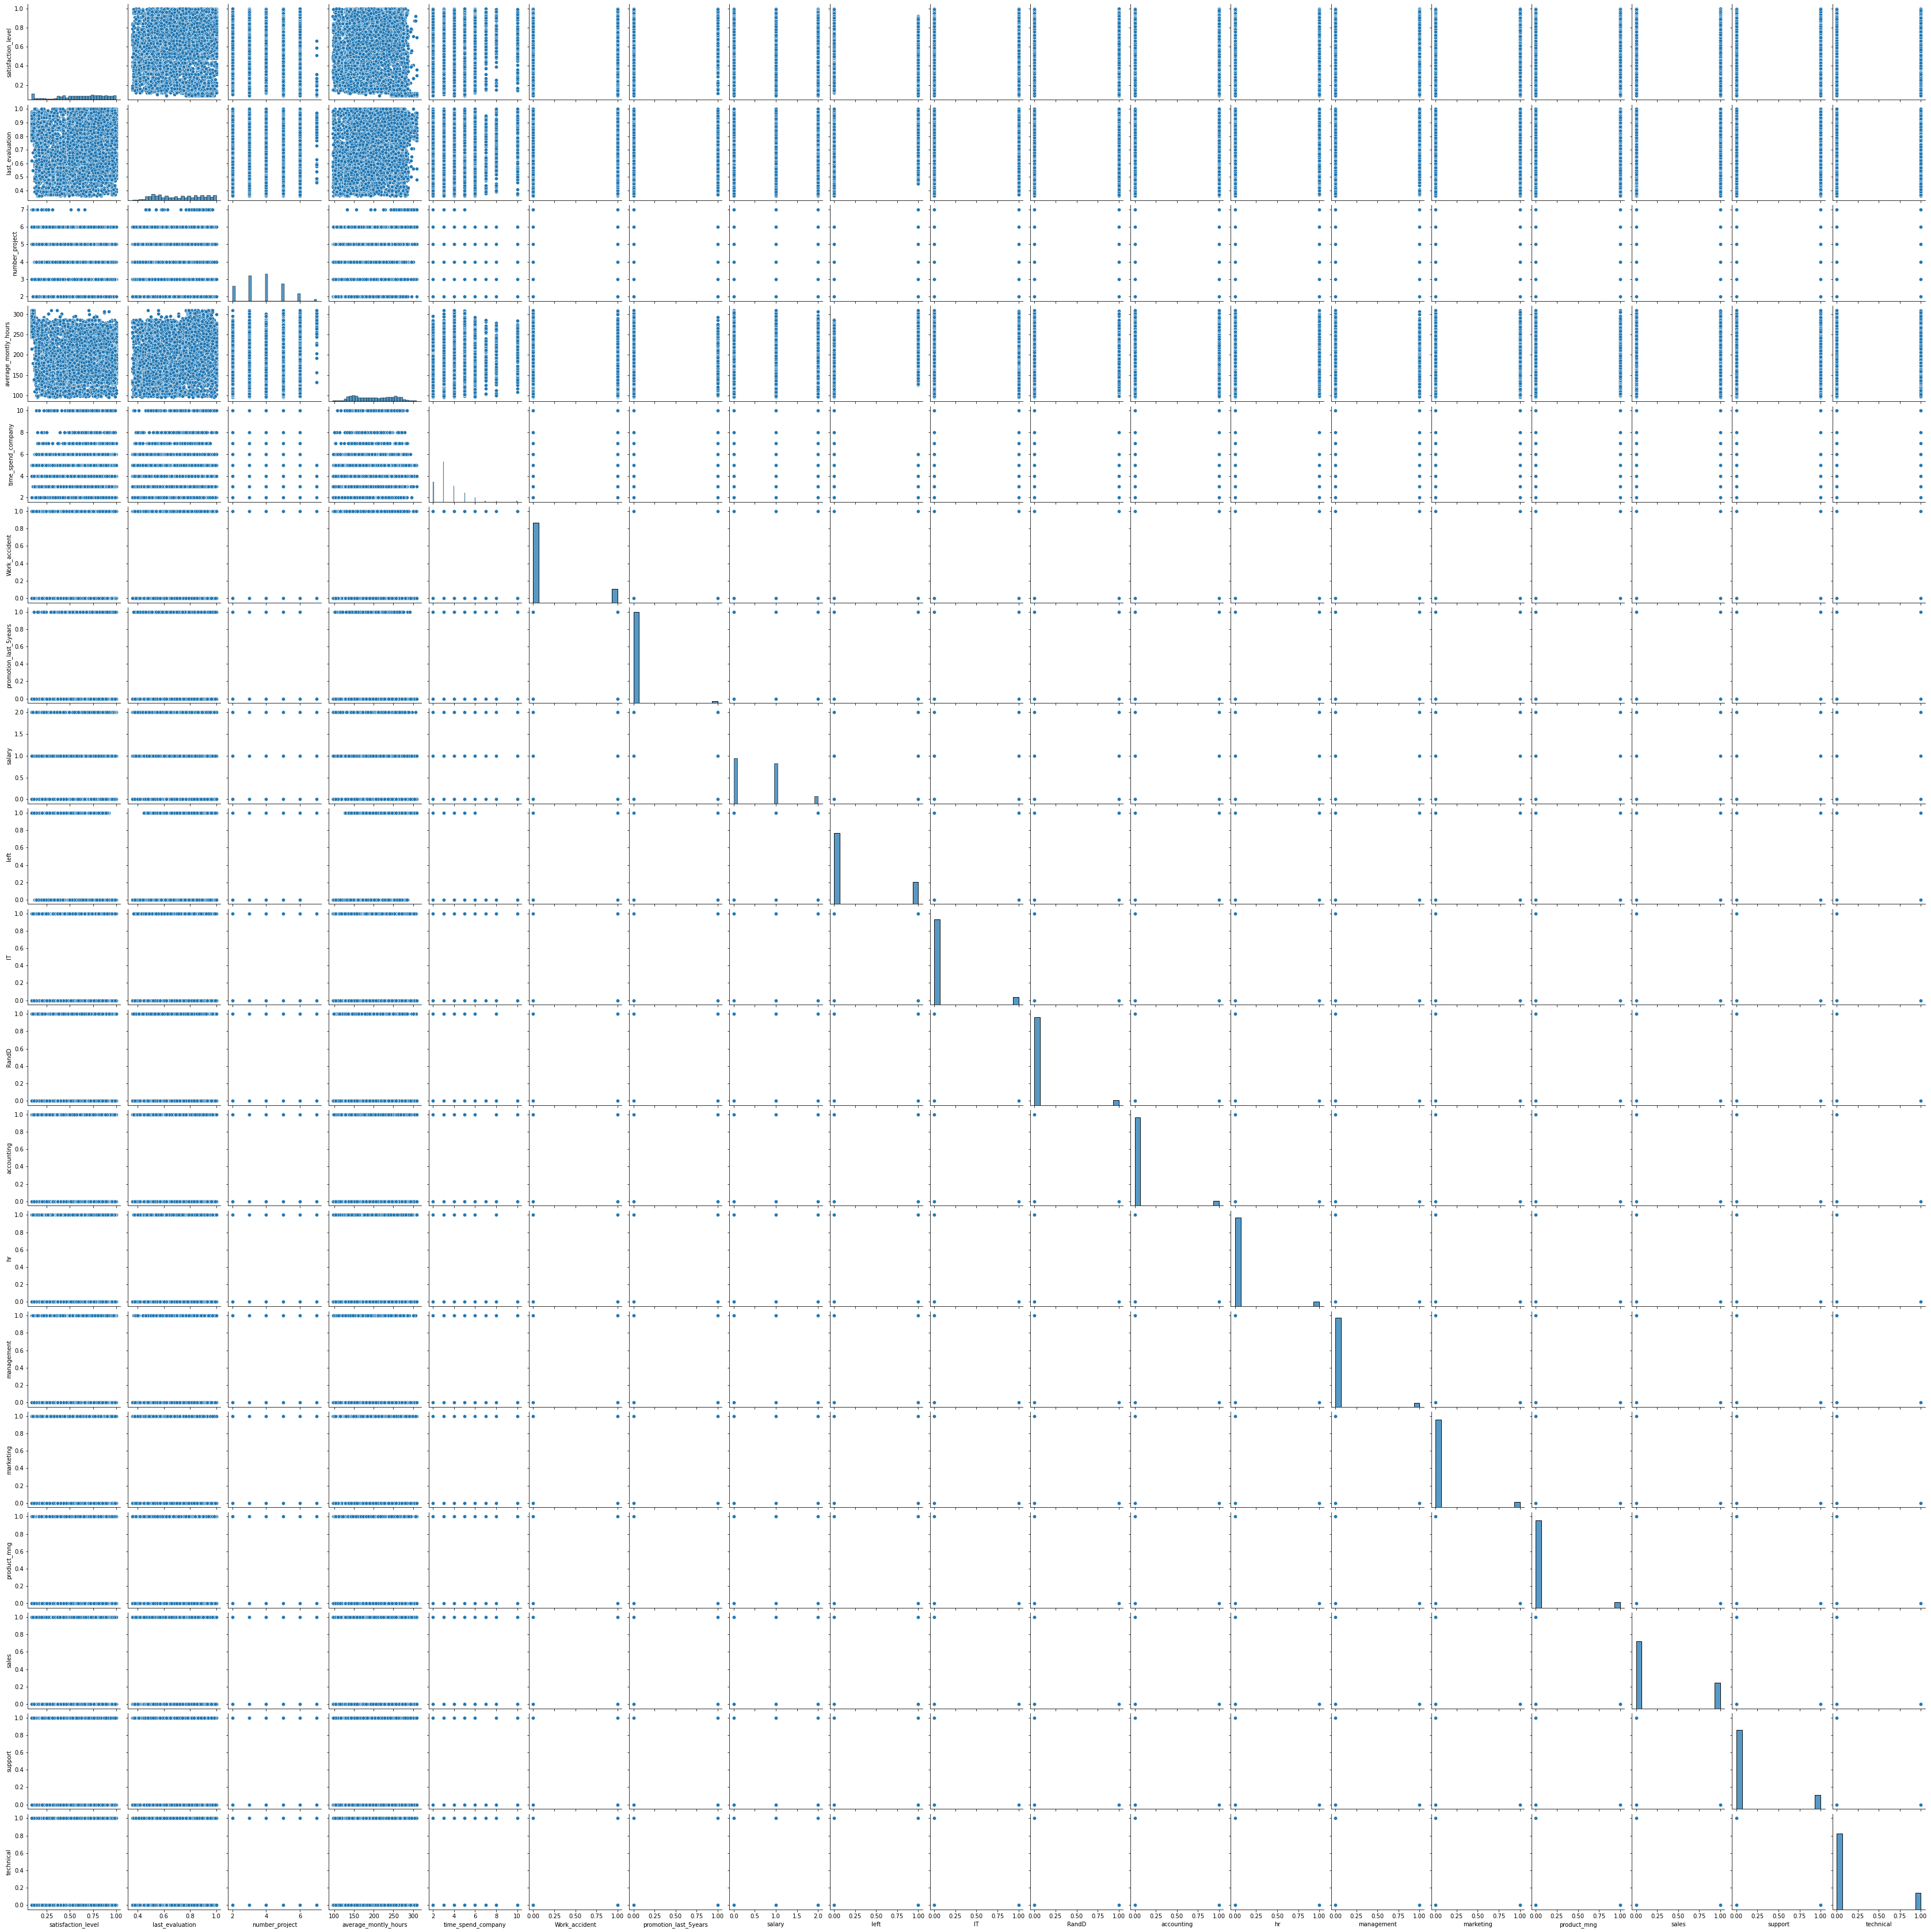

In [11]:
sns.pairplot(data)

Также построим графики всех признаков. Из них видно, что выбросов не наблюдается.

Также построим на них линии, обозначающие квантиль 0.995. Выше этих линий нет обособленных значений.

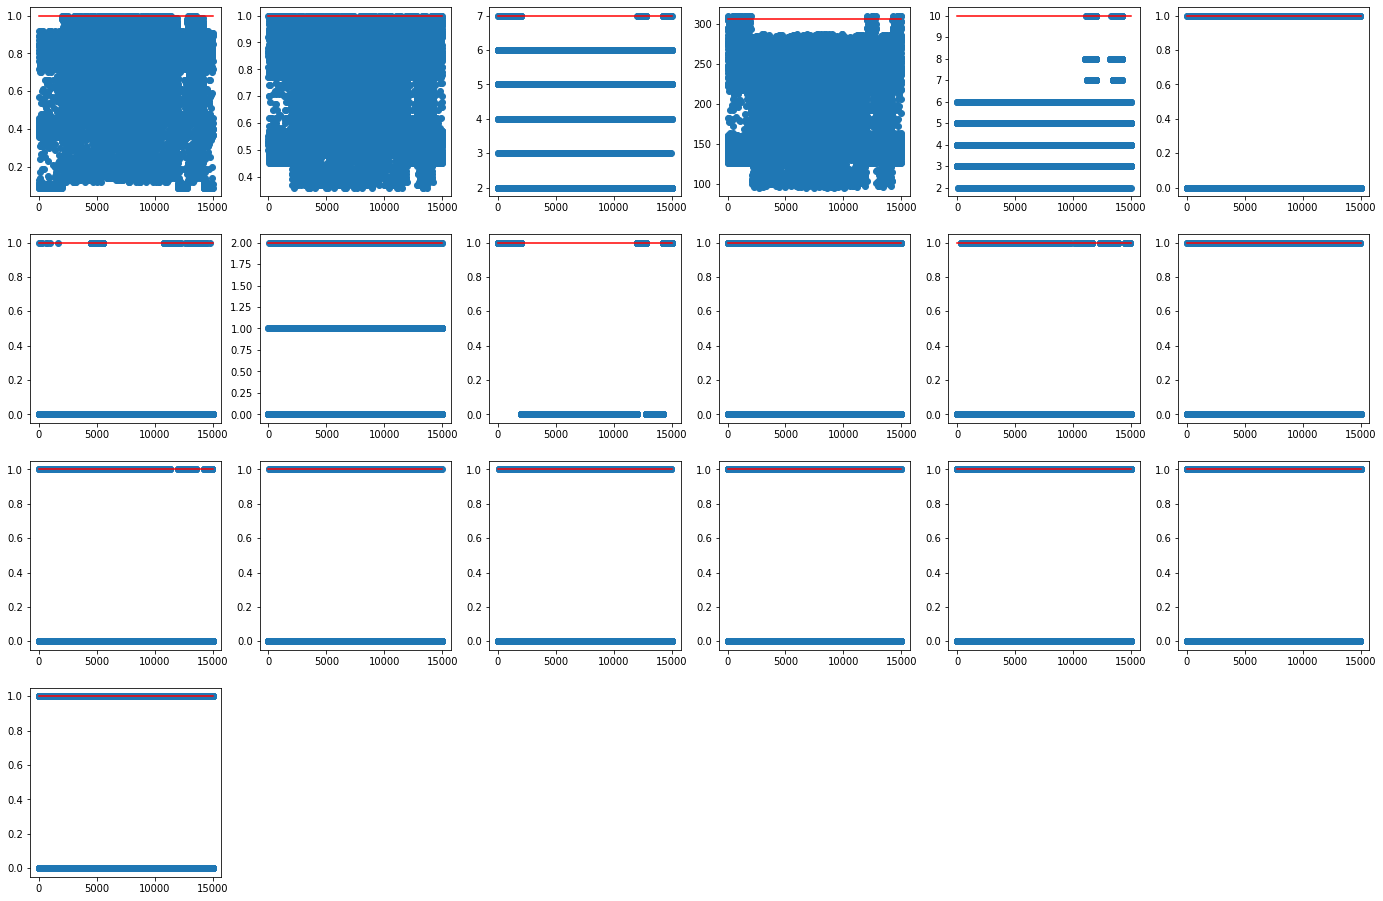

In [42]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
    plt.subplot(4, 6, i)
    plt.scatter([i for i in range(len(data[column]))], data[column])
    for quantile in data[column].quantile([.995]) :
        plt.plot([0, len(data[column])], [quantile, quantile], 'r-')
    i += 1

# Визуализация и описательная статистика

Выведем таблицу, содержащую информацию о признаках, например, среднее, отклонение, квантили.

In [13]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.594706,0.238083,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Построим диаграммы рассеивания всех признаков и целевого значения "left".

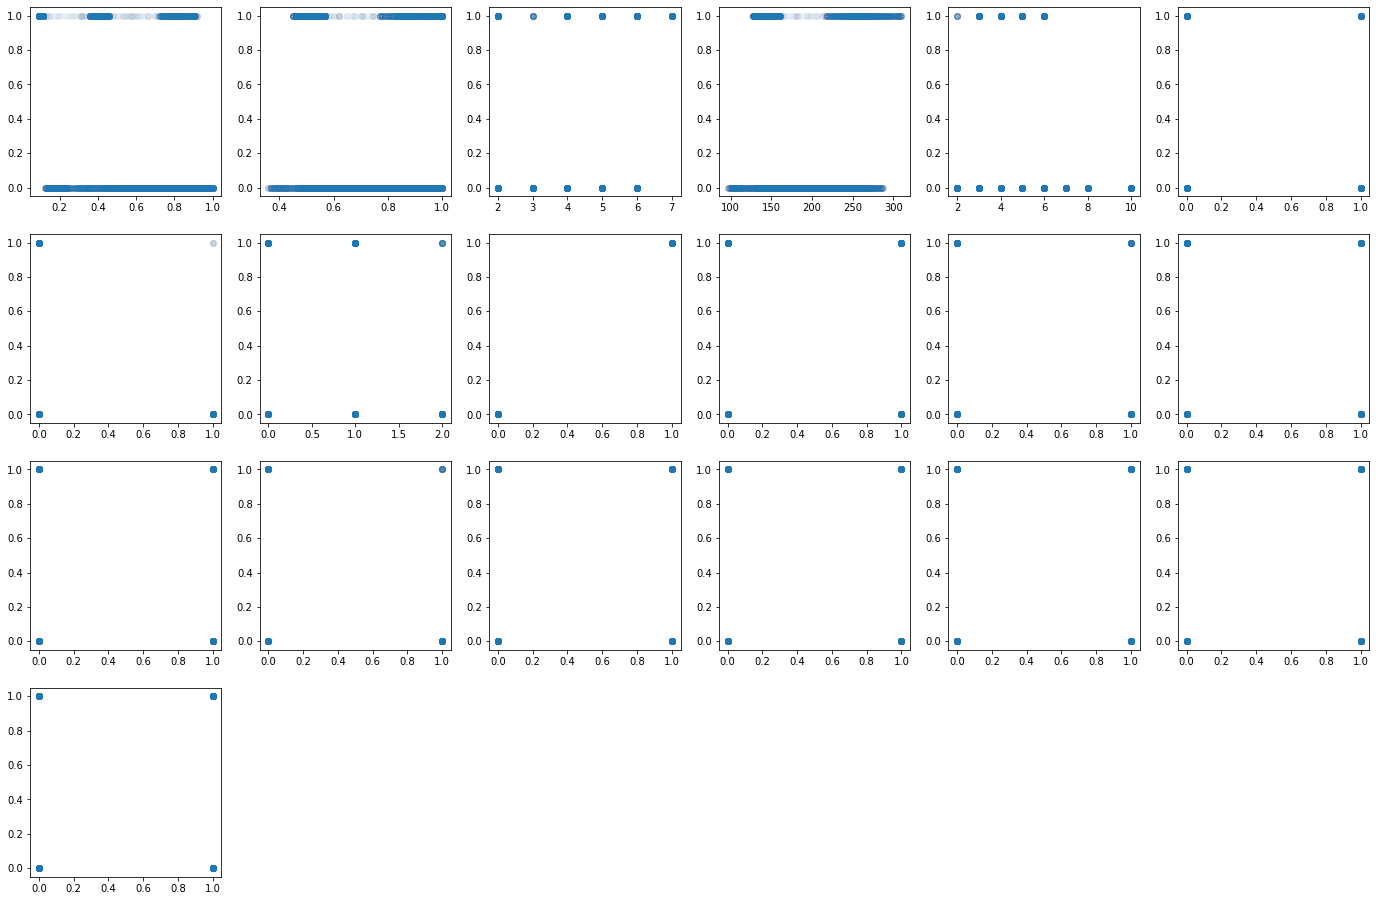

In [14]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
  plt.subplot(4, 6, i)
  plt.scatter(data[column], data['left'], alpha = 0.01)
  i += 1

Также посмотрим диаграммы рассеивания всех признаков, где цвет точки определяется значением целевого значения "left".

Так как значений очень много, а отрисовка точек занимает много времени, нарисуем только 100 значений, выбранные случайным образом.

No handles with labels found to put in legend.


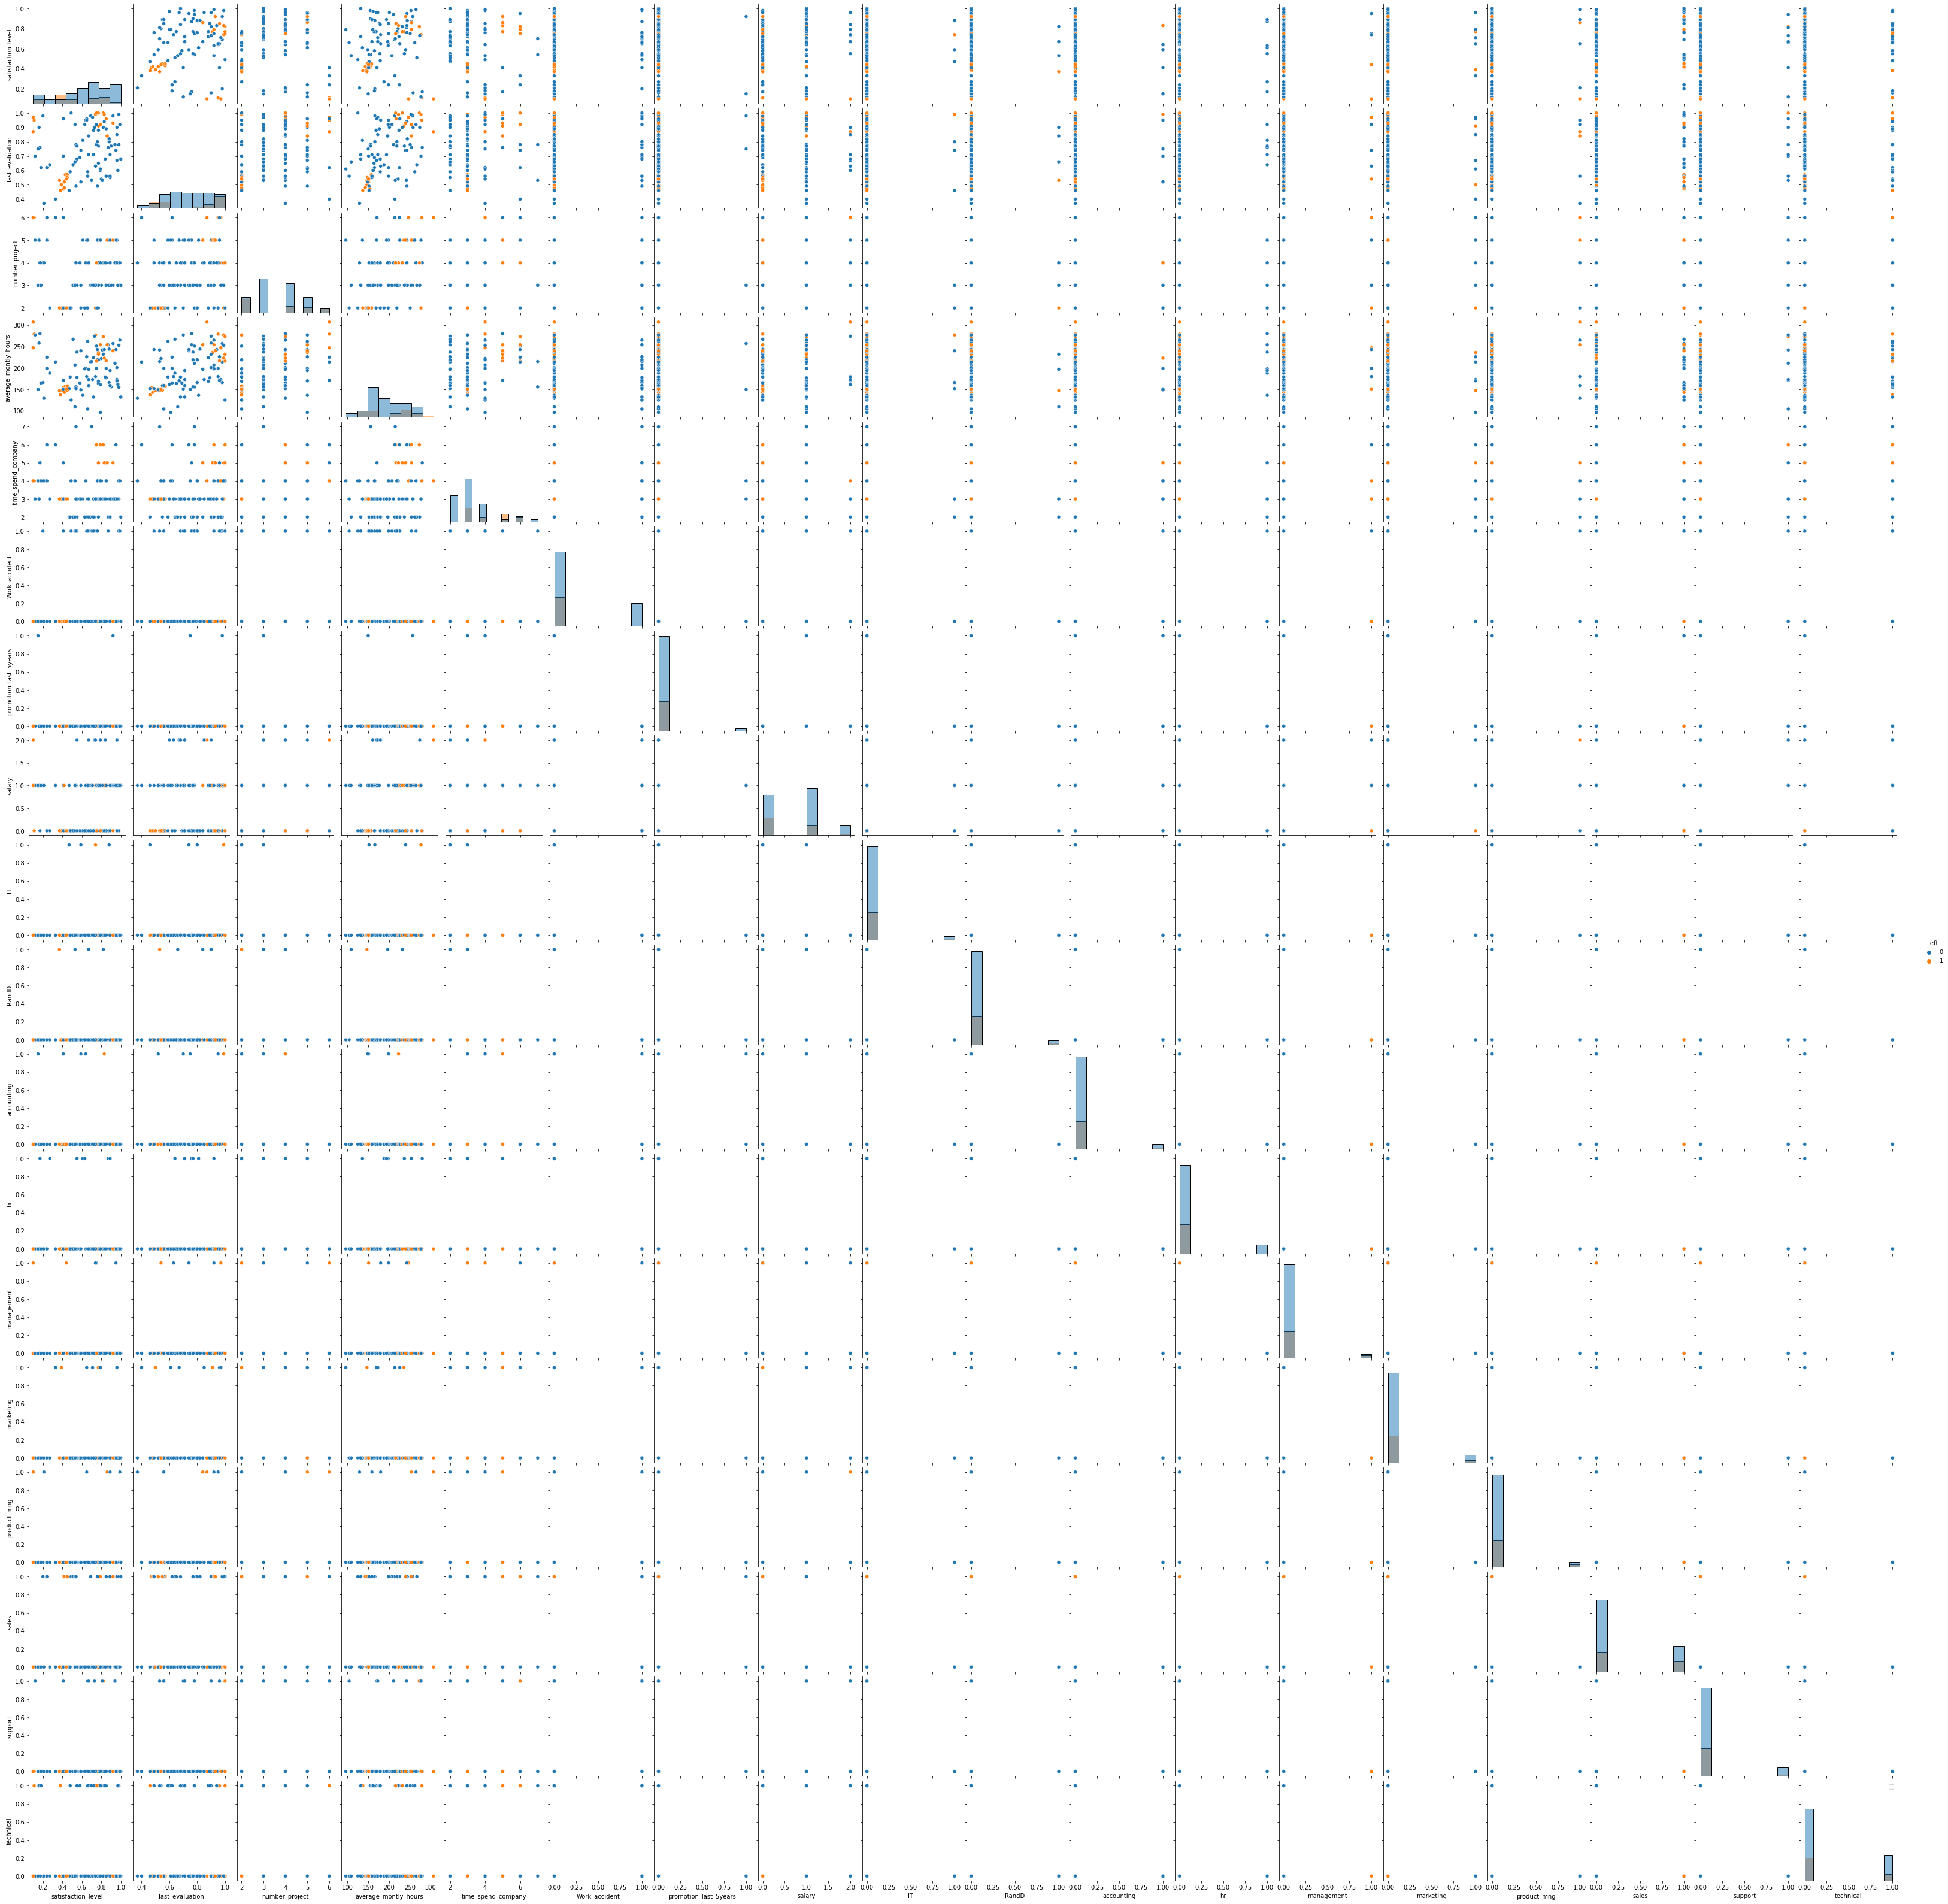

In [45]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
sns.pairplot(data.iloc[random_subset], hue='left', diag_kind='hist')
plt.legend()

Также нарисуем гистограммы, которые находились на главной диагонали придыдущего графика.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

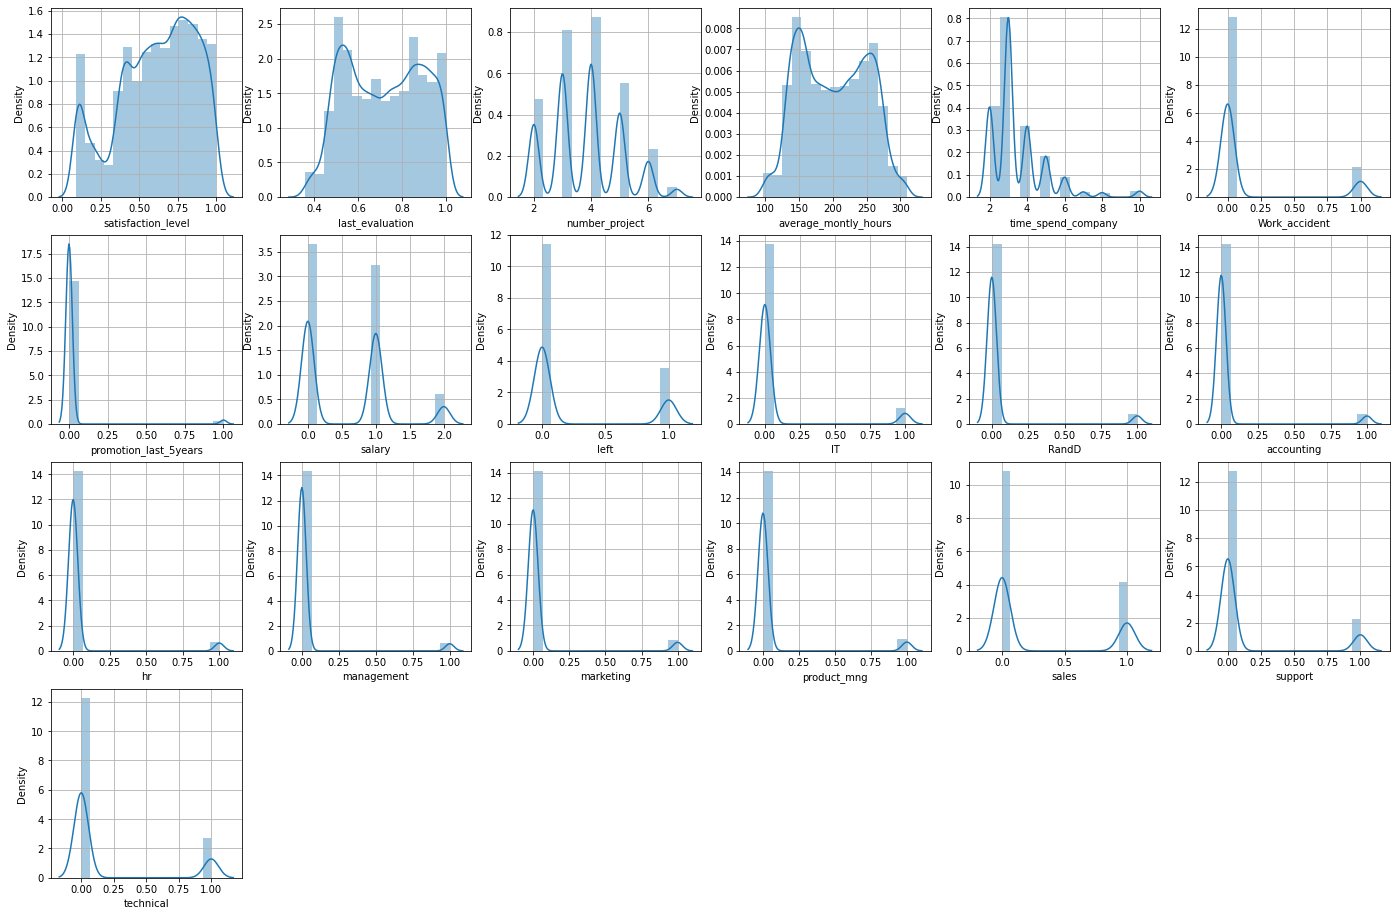

In [16]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
  plt.subplot(4, 6, i)
  sns.distplot(data[column], bins=15)
  plt.grid()
  i += 1

Еще одним важным типов визуализации является график "ящик с усами"

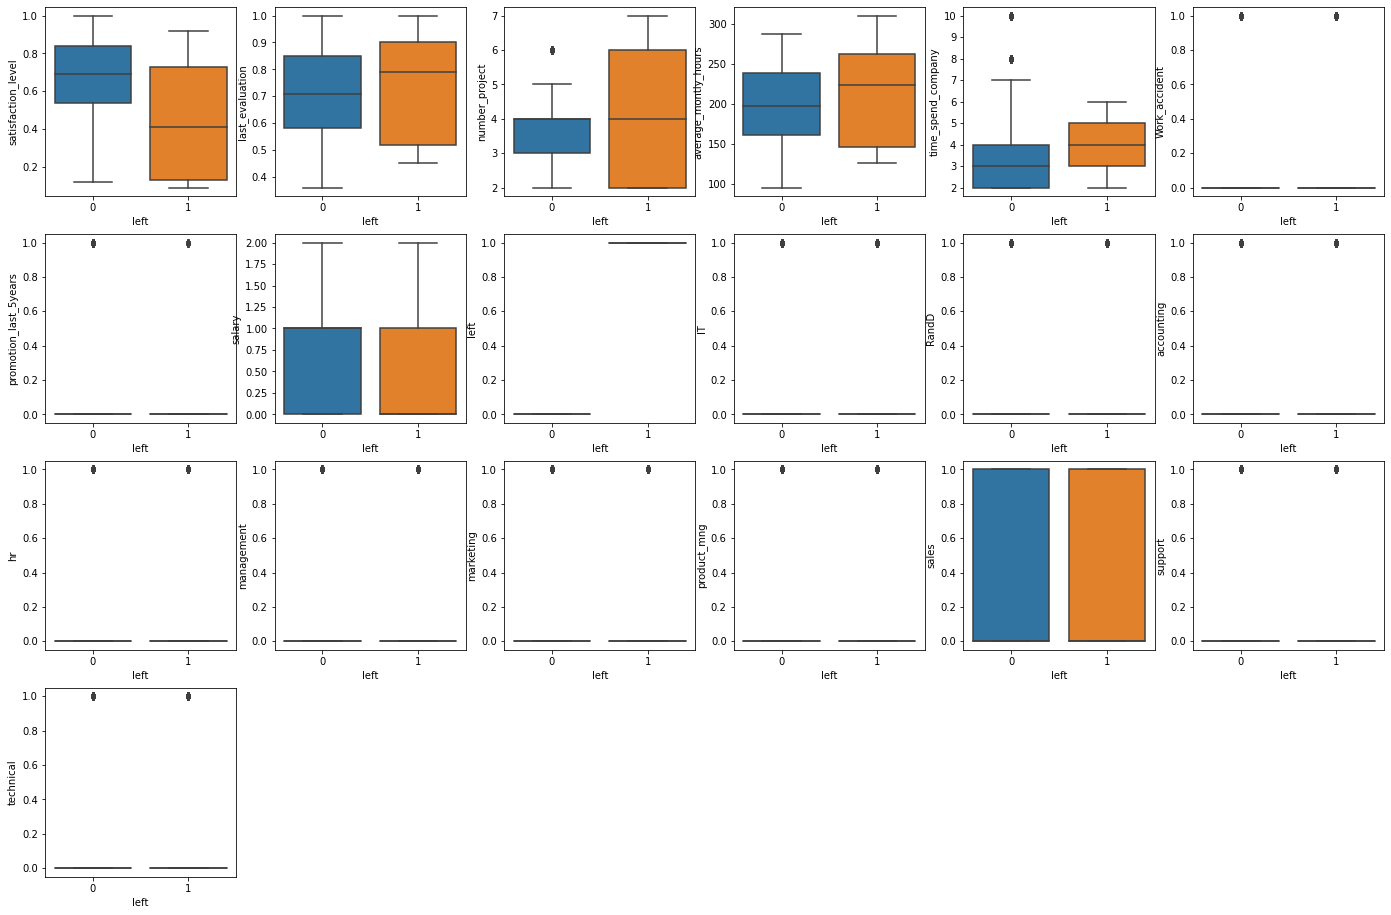

In [17]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
  plt.subplot(4, 6, i)
  sns.boxplot(x="left", y=column, data=data)
  i += 1

Также информацию можно получить, рассмотрев скрипичные графики.

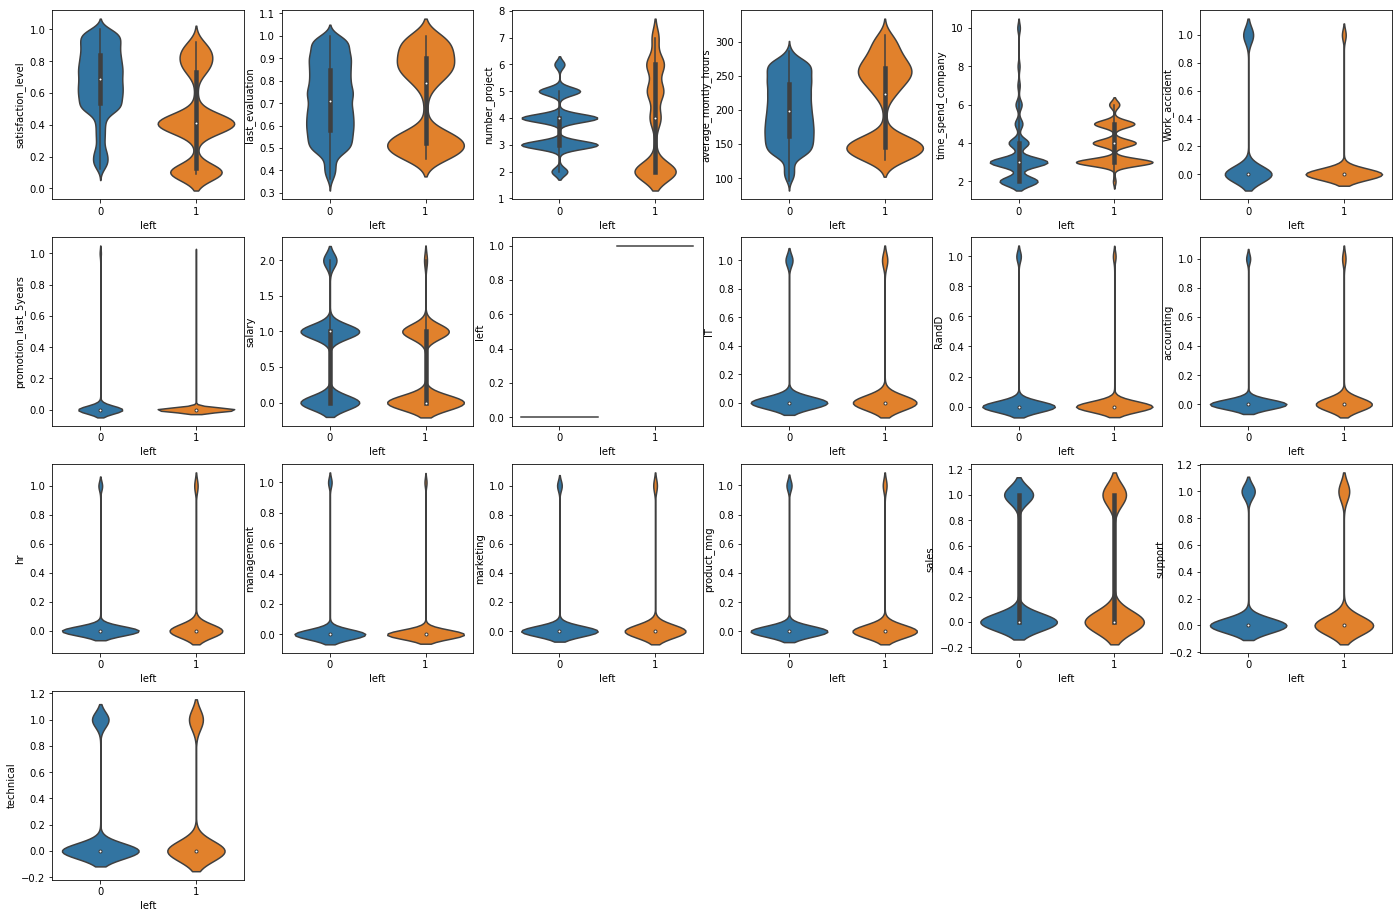

In [18]:
i = 1
plt.rcParams["figure.figsize"] = (24, 16)
for column in data.columns :
  plt.subplot(4, 6, i)
  sns.violinplot(x="left", y=column, data=data)
  i += 1

Напечатаем матрицу корреляции наших признаков.
Видно, что признаки редко превышают значение 0.3.

In [19]:
corr_mat = data.corr()
corr_mat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.050022,-0.388375,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.013002,0.006567,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.001803,0.023787,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002242,0.071287,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.048715,0.144822,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.009247,-0.154622,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.098119,-0.061788,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,1.000000,-0.157898,-0.010959,0.002800,0.012759,0.004599,0.156665,0.011599,-0.007669,-0.035599,-0.029888,-0.018630
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.157898,1.000000,-0.010925,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076
IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.038942,-0.010959,-0.010925,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484


Визуализируем матрицу корреляции.

<AxesSubplot:>

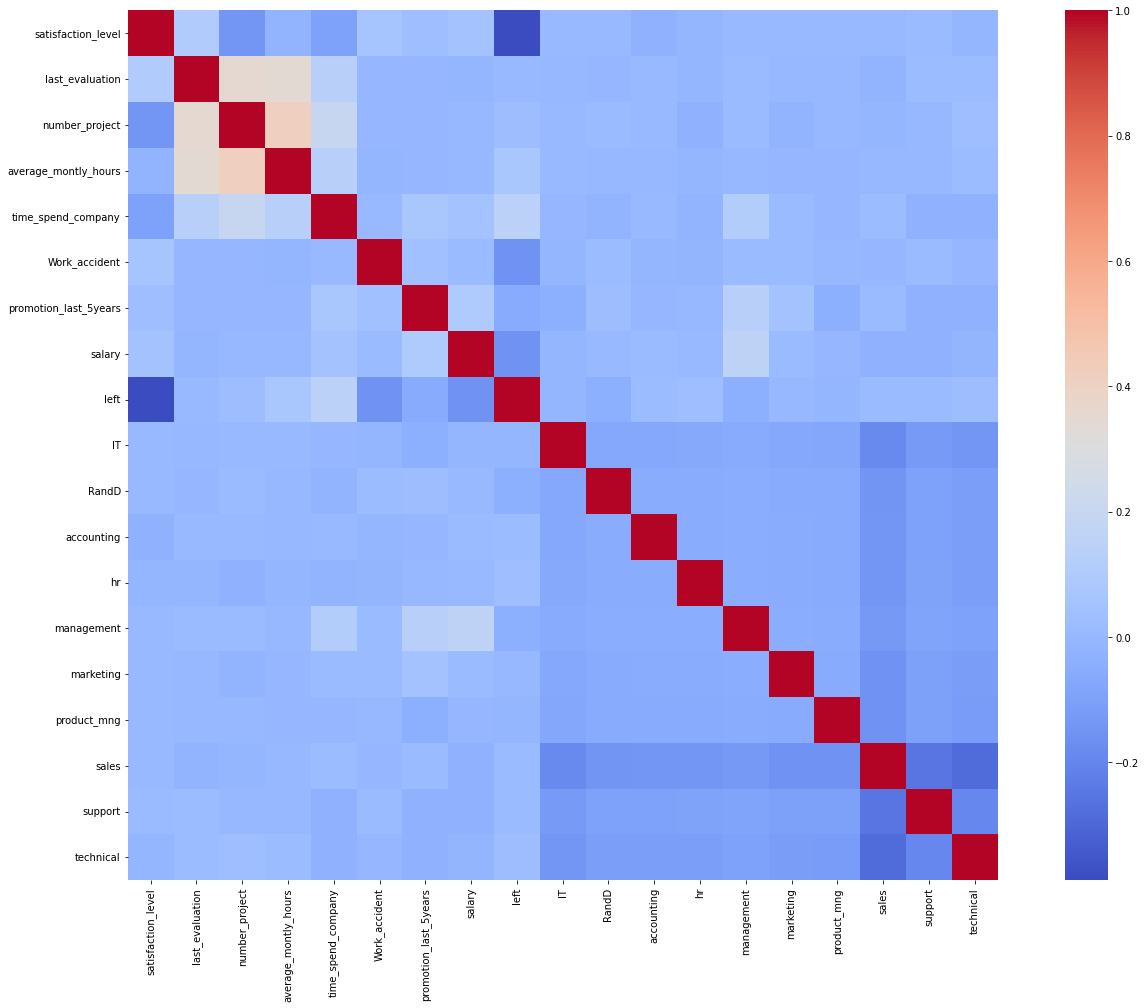

In [20]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Посмотрим, какие значения таблицы превышают 0.3

In [22]:
abs(corr_mat) > 0.3

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
satisfaction_level,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
last_evaluation,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number_project,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
average_montly_hours,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
time_spend_company,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Work_accident,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
promotion_last_5years,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
salary,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
left,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
IT,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [23]:
corr_mat.where(np.triu(abs(corr_mat) > 0.3, k=1)).stack().sort_values(ascending=False)

number_project      average_montly_hours    0.417211
last_evaluation     number_project          0.349333
                    average_montly_hours    0.339742
satisfaction_level  left                   -0.388375
dtype: float64

# Нормализация

Посмотрим на данные и увидим, что средние значения признаков сильно отличаются. Это может негативно сказаться на обучение модели KNN.

Выполним стандартизацию признаков.

In [25]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.594706,0.238083,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,14999.000000,1.499900e+04,14999.000000,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,3.183444e-16,-3.941406e-16,1.136944e-16,-8.906063e-17,-1.515926e-17,8.337591e-17,0.000000,-3.789814e-17,0.000000,-3.789814e-18,4.547777e-17,9.190299e-17,1.136944e-17,6.063702e-17,5.021503e-17,-1.894907e-17,8.906063e-17,-3.979305e-17,-7.579628e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.102852e+00,-2.080409e+00,-1.462814e+00,-2.103400e+00,-1.026091e+00,-4.111516e-01,-0.147407,-9.333368e-01,-0.558979,-2.984759e-01,-2.353127e-01,-2.321401e-01,-2.276397e-01,-2.093835e-01,-2.463140e-01,-2.529446e-01,-6.174343e-01,-4.177776e-01,-4.706396e-01
25%,-6.951417e-01,-9.119738e-01,-6.515159e-01,-9.020333e-01,-3.412238e-01,-4.111516e-01,-0.147407,-9.333368e-01,-0.558979,-2.984759e-01,-2.353127e-01,-2.321401e-01,-2.276397e-01,-2.093835e-01,-2.463140e-01,-2.529446e-01,-6.174343e-01,-4.177776e-01,-4.706396e-01
50%,1.092644e-01,2.277432e-02,1.597823e-01,-2.103067e-02,-3.412238e-01,-4.111516e-01,-0.147407,6.360711e-01,-0.558979,-2.984759e-01,-2.353127e-01,-2.321401e-01,-2.276397e-01,-2.093835e-01,-2.463140e-01,-2.529446e-01,-6.174343e-01,-4.177776e-01,-4.706396e-01
75%,8.332298e-01,8.991007e-01,9.710806e-01,8.799947e-01,3.436438e-01,-4.111516e-01,-0.147407,6.360711e-01,-0.558979,-2.984759e-01,-2.353127e-01,-2.321401e-01,-2.276397e-01,-2.093835e-01,-2.463140e-01,-2.529446e-01,1.619497e+00,-4.177776e-01,-4.706396e-01
max,1.557195e+00,1.658583e+00,2.593677e+00,2.181476e+00,4.452849e+00,2.432031e+00,6.783490,2.205479e+00,1.788857,3.350131e+00,4.249382e+00,4.307456e+00,4.392614e+00,4.775606e+00,4.059588e+00,3.953171e+00,1.619497e+00,2.393459e+00,2.124626e+00


# Обучение KNN

Разобьем данные на обучающую и тестовую выборки

In [27]:
X = data_stand.drop(['left'], axis=1)
y = data['left']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(11249, 3750)

Создадим и обучим модель KNN с 3 соседями.

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN(3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Вычислим ошибку, используя разные метрики.

In [31]:

from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.023468752778024713, 0.0512, 0.8704843313540824, 0.7186555957643601)

In [32]:
model.score(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9765312472219753

In [33]:
model.score(X_test, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9488

Повторим операции для KNN с 5 и 7 соседями и сравним результаты.

In [35]:
model = KNN(5)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test, model.score(X_train, y_train), model.score(X_test, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(0.03964796870832963,
 0.058133333333333335,
 0.7811970143330331,
 0.6805568743574504,
 0.9603520312916703,
 0.9418666666666666)

In [36]:
model = KNN(7)
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test, model.score(X_train, y_train), model.score(X_test, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(0.04658191839274602,
 0.06,
 0.7429310213240119,
 0.6702995262863594,
 0.9534180816072539,
 0.94)

# Выводы

В результаты проделанной работы мы скачали данные, проверили наличие выбросов, нормировали значения, провели анализ данных.

Обучили KNN с разым количеством соседей и увидели, что увеличение числа соседей негативно сказывается на качетсве работы классификатора.